#TUGAS AKHIR PRAKTIKUM PEMROGRAMAN DATA ANALISIS

Nama Kelompok:<br>
Ketua Kelompok: Nadias Pangestu (065117187)<br>
Anggota:<br>
1. Hilman Naufal (065117235)
2. Nadias Pangestu (065117187)

Pada tugas akhir ini, kami sekelompok melakukan analsis dan visualisasi terhadap dataset yang bernama Wine

##Import Dataset

In [ ]:
import pandas as pd #memanggil library pandas dialiaskan sebagai pd untuk load dataset berupa csv

In [ ]:
from google.colab import files #mengupload dataset dari penyimpanan lokal di laptop
uploaded = files.upload()

Saving wine.csv to wine.csv


In [ ]:
data = pd.read_csv('wine.csv')

In [ ]:
data #memanggil variabel data

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,First-class
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,First-class
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,First-class
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,First-class
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,First-class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Third-class
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Third-class
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Third-class
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Third-class


In [ ]:
data.head() #melihat 5 data teratas

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,First-class
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,First-class
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,First-class
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,First-class
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,First-class


In [ ]:
data.describe() #melihat nilai rata-rata, min, standar deviasi dan lain-lain.

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.057528,0.957416,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.317118,0.228580,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.dtypes #melihat tipe data pada dataset abalone

Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                       float64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280_OD315_of_diluted_wines    float64
Proline                           int64
Class                            object
dtype: object

In [ ]:
data.isnull().values.any() #melihat apakah ada nilai null pada dataset

False

In [ ]:
data[data.duplicated()] #men-cek apakah ada duplikasi data

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline,Class


In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(178, 14)

In [ ]:
data.corr()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546709,-0.071615,0.072343,0.643720
Malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.249099,-0.561179,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.259095,-0.074580,0.003911,0.223626
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018741,-0.273986,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.200285,0.055362,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.054812,0.433949,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172095,0.543609,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.138896,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.024858,0.295568,0.519067,0.330417
Color_intensity,0.546709,0.249099,0.259095,0.018741,0.200285,-0.054812,-0.172095,0.138896,-0.024858,1.000000,-0.521516,-0.428694,0.316474


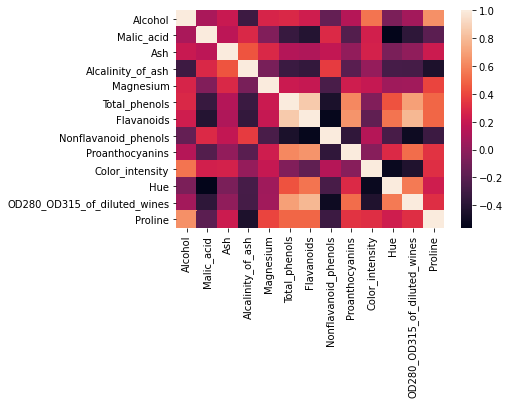

In [ ]:
import seaborn as sns
heat = sns.heatmap(data.corr())

##Visualisasi Data

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

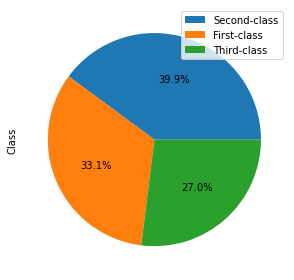

In [ ]:
data['Class'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

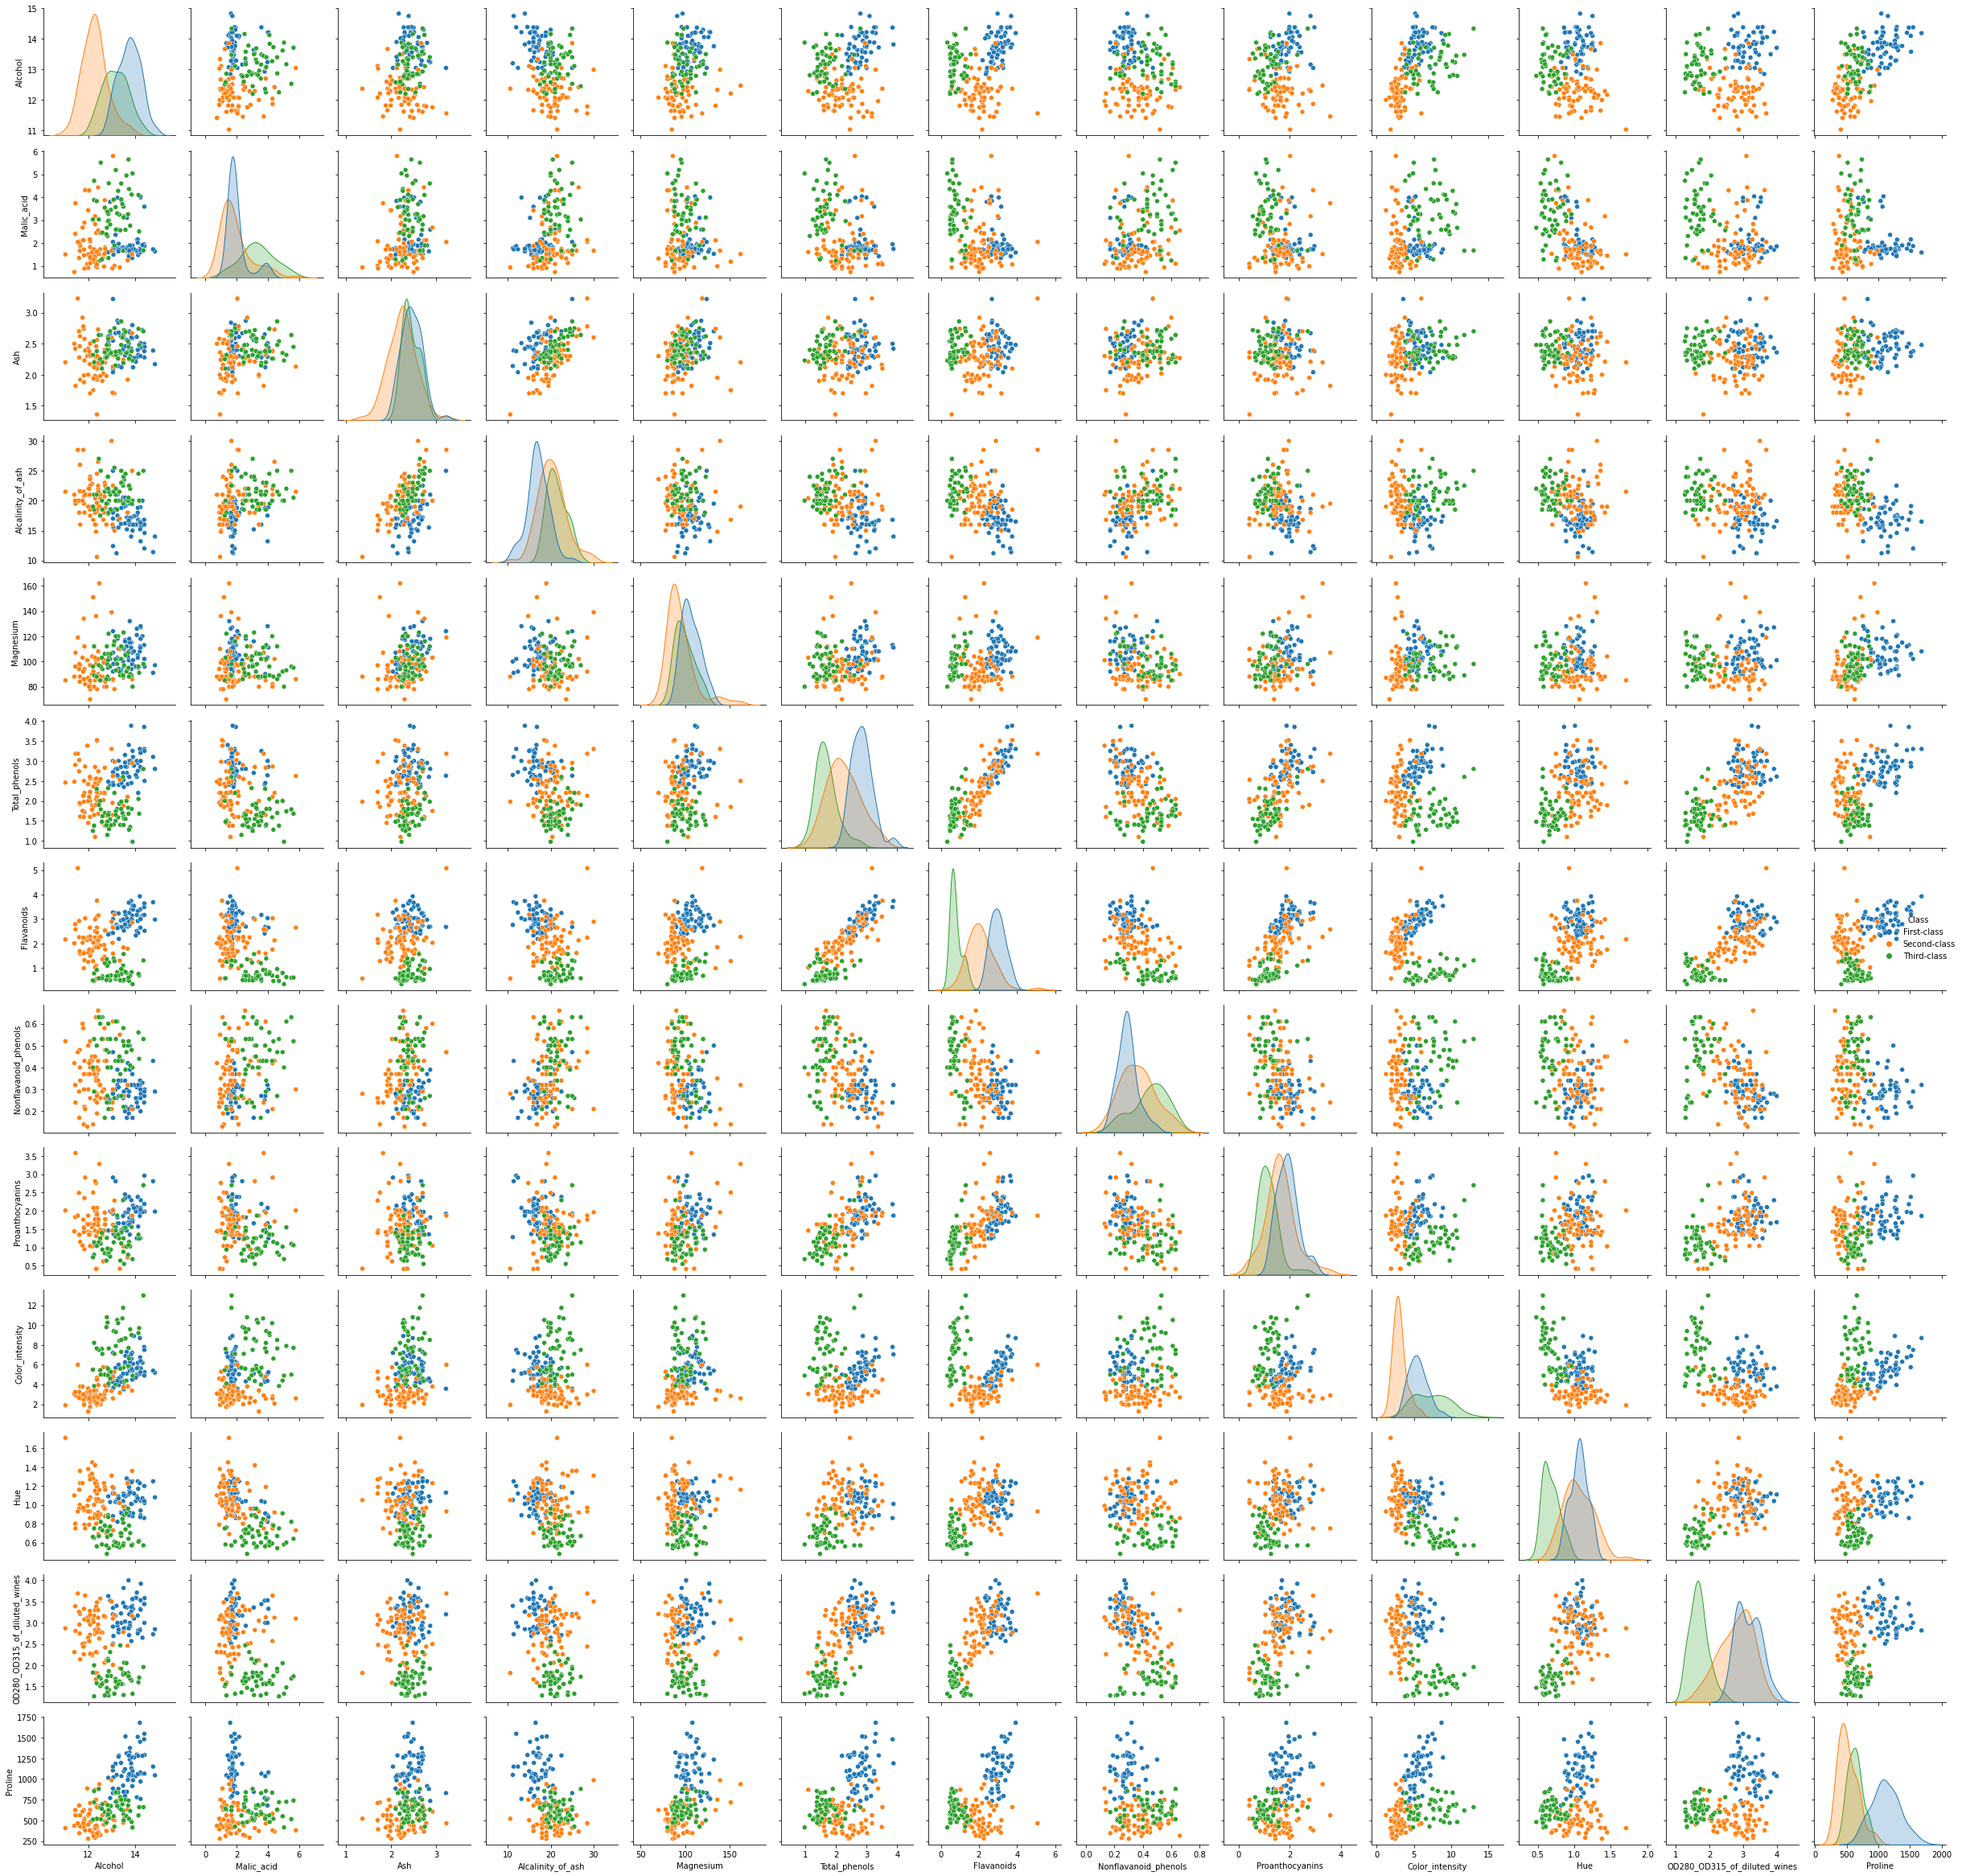

In [ ]:
sns.pairplot(data, hue='Class') #memvisualisasikan korelasi matriks
plt.tight_layout()

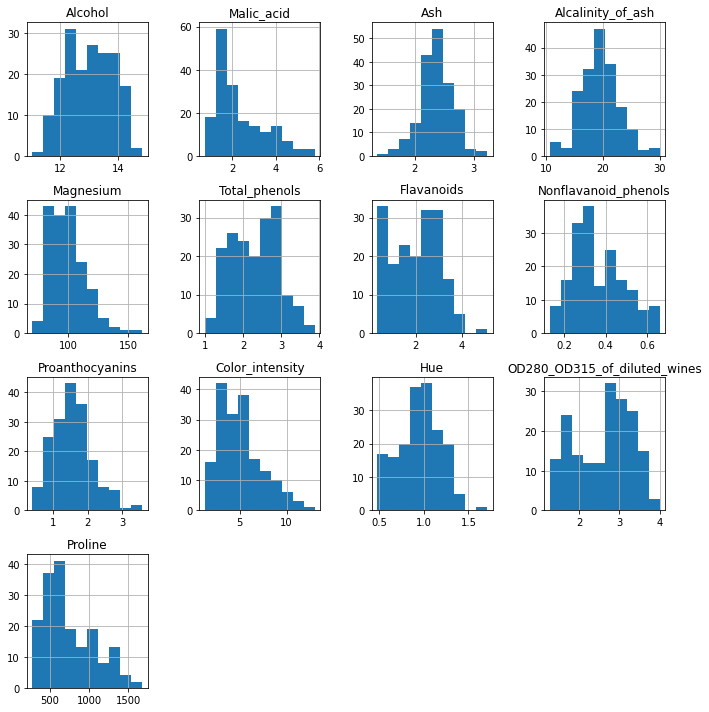

In [ ]:
data.hist(figsize=(10,10), bins=10) 
plt.tight_layout()

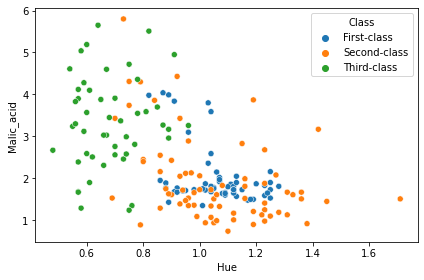

In [ ]:
sns.scatterplot(x='Hue', y='Malic_acid', data=data, hue='Class') #membandingkan 2 variabel dibagi menjadi dua sumbu yaitu x dan y, hue merupakan pengkategorian data.
plt.tight_layout()

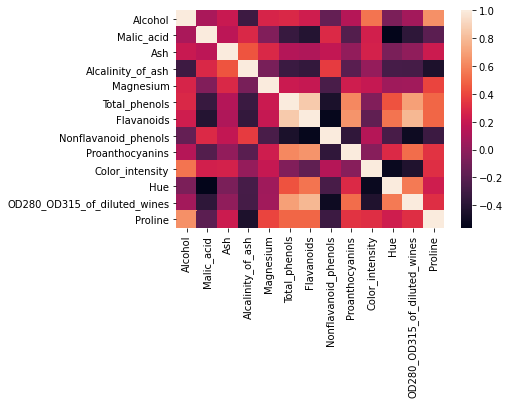

In [ ]:
sns.heatmap(data=data.corr())

##KNN Untuk Klassifikasi Data Menggunakan Sci-Kit Learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


In [ ]:
data1 = data.drop(columns='Class')
data1.head()

KeyError: ignored

In [ ]:
data3 = data1.drop(columns='Name')
data3.head()

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


In [ ]:
data2 = data['class']
data2.head()

0    cp
1    cp
2    cp
3    cp
4    cp
Name: class, dtype: object

In [ ]:
data3_train, data3_test, data2_train, data2_test = train_test_split(data3, data2, test_size=0.4, random_state=10) #membagi data menjadi training dan test
print('training dataset')
print(data3_train.shape)
print(data2_train.shape)
print()
print('testing dataset:')
print(data3_test.shape)
print(data2_test.shape)

training dataset
(201, 7)
(201,)

testing dataset:
(135, 7)
(135,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(data3_train, data2_train)
  train_accuracy[i] = knn.score(data3_train, data2_train)
  test_accuracy[i] = knn.score(data3_test, data2_test) 

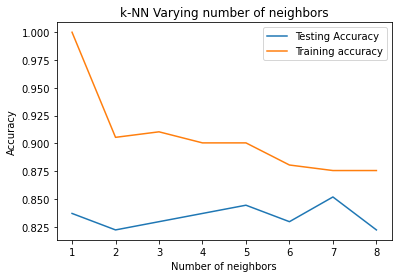

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7) # konfigurasi algoritma
knn.fit(data3_train,data2_train) # training model/classifier
data2_pred = knn.predict(data3_test) # melakukan prediksi

In [ ]:
hasil1 = knn.score(data3_test,data2_test)

In [ ]:
print(hasil1)

0.8518518518518519


In [ ]:
print(classification_report(data2_test, data2_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

          cp       0.93      0.98      0.96        58
          im       0.72      0.81      0.76        32
         imL       0.00      0.00      0.00         1
         imU       0.73      0.44      0.55        18
          om       1.00      0.80      0.89         5
         omL       1.00      1.00      1.00         1
          pp       0.86      0.95      0.90        20

    accuracy                           0.85       135
   macro avg       0.75      0.71      0.72       135
weighted avg       0.84      0.85      0.84       135



##Klasifikasi Menggunakan Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logis = LogisticRegression(solver='lbfgs', multi_class='auto')
logis.fit(data3_train,data2_train)
y_pred = logis.predict(data3_test)

In [ ]:
data2_test.head()

121    cp
119    cp
151    im
47     cp
52     cp
Name: class, dtype: object

In [ ]:
hasil2 = logis.score(data3_test,data2_test)

In [ ]:
print(hasil2)

0.7925925925925926


##Klasifikasi Menggunakan SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
scv = SVC(gamma='scale')
scv.fit(data3_train,data2_train)
y_pred = scv.predict(data3_test)

In [ ]:
hasil3 = scv.score(data3_test,data2_test)

In [ ]:
print(hasil3)

0.8740740740740741


##Klasifikasi Menggunakan Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(data3_train,data2_train)
y_pred = tree.predict(data3_test)

In [ ]:
hasil4 = tree.score(data3_test,data2_test)

In [ ]:
hasil4

0.8074074074074075

##Klasifikasi Menggunakan Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ft = RandomForestClassifier()
ft.fit(data3_train,data2_train)
y_pred = ft.predict(data3_test)

In [ ]:
hasil5 = ft.score(data3_test,data2_test)

In [ ]:
hasil5

0.8740740740740741

##Perbandingan Hasil Akurasi Menggunakan 5 Algoritma Berbeda

In [ ]:
akurasi = [hasil1,hasil2,hasil3,hasil4,hasil5]
print(akurasi)

[0.8518518518518519, 0.7925925925925926, 0.8740740740740741, 0.8074074074074075, 0.8740740740740741]


In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],akurasi)
plt.ylim(0.90,1.01)
plt.title('Perbandingan Hasil Akurasi Menggunakan 5 Algoritma Berbeda', fontsize=15)
plt.xlabel('Algoritma', fontsize=18)
plt.ylabel('Nilai Akurasi', fontsize=18)
plt.tight_layout()
plt.show()